In [2]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")   # go one level up from notebooks/
sys.path.append(PROJECT_ROOT)


In [3]:
import os
import json
import pickle
from collections import Counter
import matplotlib.pyplot as plt

from src.config import *


In [4]:

with open(os.path.join(PROCESSED_DATA_DIR, "encoded_captions.pkl"), "rb") as f:
    encoded = pickle.load(f)

with open(os.path.join(PROCESSED_DATA_DIR, "train_val_split.json"), "r") as f:
    split = json.load(f)

print("Total Images:", len(encoded))
print("Train Images:", len(split["train"]))
print("Val Images:", len(split["val"]))


Total Images: 8091
Train Images: 6472
Val Images: 1619


In [6]:
with open(os.path.join(PROCESSED_DATA_DIR, "vocabulary.json"), "r") as f:
    vocab = json.load(f)

print("Vocabulary Size:", len(vocab))


Vocabulary Size: 5202


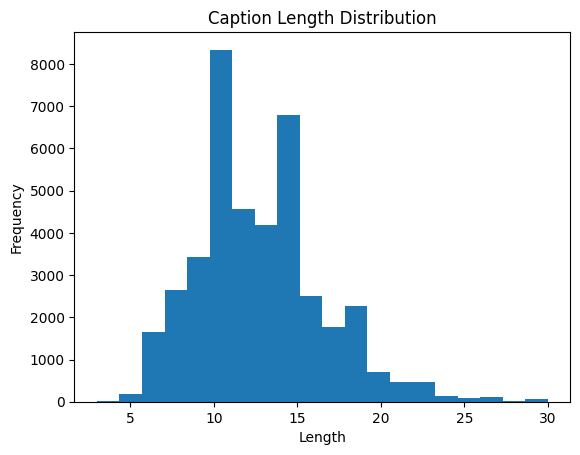

In [7]:
caption_lengths = []

for captions in encoded.values():
    for cap in captions:
        length = len([w for w in cap if w != vocab["<pad>"]])
        caption_lengths.append(length)

plt.hist(caption_lengths, bins=20)
plt.title("Caption Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


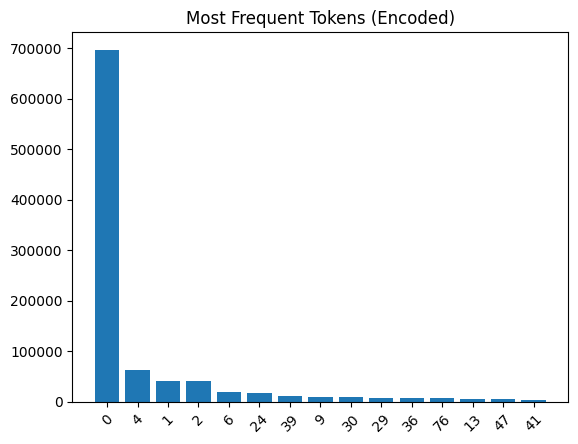

In [8]:
counter = Counter()

for captions in encoded.values():
    for cap in captions:
        counter.update(cap)

most_common = counter.most_common(15)

words = [str(w[0]) for w in most_common]
freqs = [w[1] for w in most_common]

plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Most Frequent Tokens (Encoded)")
plt.show()
